In [2]:
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt

# Importing the image

In [3]:
arr = np.array(Image.open('rotate.png'))

In [11]:
deg_angle = int(input("Degrees: "))
angle = math.radians(deg_angle)

h = arr.shape[0]
w = arr.shape[1]

min_new_x = 0
max_new_x = 0
min_new_y = 0
max_new_y = 0

new_coordinates = []

for x in range(h):
    for y in range(w):
            new_x = int(round(x*math.cos(angle) - y*math.sin(angle)))
            new_y = int(round(x*math.sin(angle) + y*math.cos(angle)))
        
            val = arr[x][y][:]
            new_coordinates.append((val, new_x, new_y))
            
            if new_x < min_new_x: 
                min_new_x = new_x
            if new_x > max_new_x: 
                max_new_x = new_x
            if new_y < min_new_y: 
                min_new_y = new_y
            if new_y > max_new_y: 
                max_new_y = new_y

new_height = max_new_x - min_new_x
new_width = max_new_y - min_new_y

rotated = np.zeros((new_height + 1, new_width + 1, 4))
offsetx = abs(min_new_x)
offsety = abs(min_new_y)

for c in new_coordinates:
    val = c[0]
    x = c[1]
    y = c[2]
    if (rotated[offsetx + x][offsety + y][0] == 0) & (rotated[offsetx + x][offsety + y][1] == 0) & (rotated[offsetx + x][offsety + y][2] == 0) & (rotated[offsetx + x][offsety + y][3] == 0):
        rotated[offsetx + x][offsety + y][0] = val[0]
        rotated[offsetx + x][offsety + y][1] = val[1]
        rotated[offsetx + x][offsety + y][2] = val[2]
        rotated[offsetx + x][offsety + y][3] = val[3]

for i in range(rotated.shape[0]):
    previous = [rotated[i][0][0], rotated[i][0][1], rotated[i][0][2], rotated[i][0][3]]
    for j in range(rotated.shape[1]-1):
        if (not any(rotated[i][j][:])) and (any(rotated[i][j+1][:])):
            rotated[i][j][:] = previous
        else:
            previous = rotated[i][j][:]


Degrees: 3


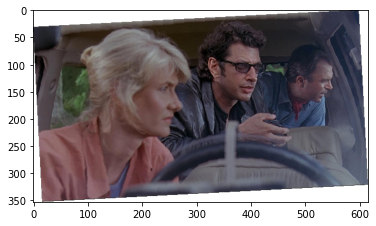

In [12]:
img = Image.fromarray(np.uint8(rotated))
plt.imshow(img)
img.save("rotated.png")